*project proposal*

markdown

In [2]:
library(tidyverse)
library(tidymodels)
library(rvest)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
url_ <- "https://archive.ics.uci.edu/static/public/109/wine.zip"
destination <- "data/wine.zip"
download.file(url_, destination)
outdir <- "data/unzip"
unzip("data/wine.zip", exdir = outdir)

In [4]:
wine_data <- read_delim("data/unzip/wine.data", delim = ",", col_name = FALSE)|>
             mutate(X1 = as_factor(X1))

#the column name copied from the source url https://archive.ics.uci.edu/dataset/109/wine
colnames(wine_data) <- c('class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
                         'Nonflavanoid_phenols','Proanthocyanins','Color_intensity', 'Hue','0D280_0D315_of_diluted_wines',
                         'Proline')

# we tried scratch column names directly from the webpage, but it just missed some columns due to unknown reasons,
# and we couldn't fix the issue even after consulting TAs
# webpage <- read_html("https://archive.ics.uci.edu/dataset/109/wine")
# col_data <- html_nodes(webpage, "td:nth-child(1)")
# col_text <- html_text(cell_data)

# colnames(wine_data) <- col_text
wine_data

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


class Alcohol Malicacid Ash  Alcalinity_of_ash Magnesium Total_phenols
1   1     14.23   1.71      2.43 15.6              127       2.80         
2   1     13.20   1.78      2.14 11.2              100       2.65         
3   1     13.16   2.36      2.67 18.6              101       2.80         
⋮   ⋮     ⋮       ⋮         ⋮    ⋮                 ⋮         ⋮            
176 3     13.27   4.28      2.26 20.0              120       1.59         
177 3     13.17   2.59      2.37 20.0              120       1.65         
178 3     14.13   4.10      2.74 24.5               96       2.05         
    Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity Hue 
1   3.06       0.28                 2.29            5.64            1.04
2   2.76       0.26                 1.28            4.38            1.05
3   3.24       0.30                 2.81            5.68            1.03
⋮   ⋮          ⋮                    ⋮               ⋮               ⋮   
176 0.69       0.43                 1.35            10.2            0.59
177 0.68       0.53                 1.46             9.3            0.60
178 0.76       0.56                 1.35             9.2            0.61
    0D280_0D315_of_diluted_wines Proline
1   3.92                         1065   
2   3.40                         1050   
3   3.17                         1185   
⋮   ⋮                            ⋮      
176 1.56                         835    
177 1.62                         840    
178 1.60                         560

In [5]:
wine_split <- initial_split(wine_data, prop = 0.75, strata = class)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

wine_training

class Alcohol Malicacid Ash  Alcalinity_of_ash Magnesium Total_phenols
1   1     14.23   1.71      2.43 15.6              127       2.80         
2   1     13.20   1.78      2.14 11.2              100       2.65         
3   1     13.16   2.36      2.67 18.6              101       2.80         
⋮   ⋮     ⋮       ⋮         ⋮    ⋮                 ⋮         ⋮            
131 3     13.27   4.28      2.26 20.0              120       1.59         
132 3     13.17   2.59      2.37 20.0              120       1.65         
133 3     14.13   4.10      2.74 24.5               96       2.05         
    Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity Hue 
1   3.06       0.28                 2.29            5.64            1.04
2   2.76       0.26                 1.28            4.38            1.05
3   3.24       0.30                 2.81            5.68            1.03
⋮   ⋮          ⋮                    ⋮               ⋮               ⋮   
131 0.69       0.43                 1.35            10.2            0.59
132 0.68       0.53                 1.46             9.3            0.60
133 0.76       0.56                 1.35             9.2            0.61
    0D280_0D315_of_diluted_wines Proline
1   3.92                         1065   
2   3.40                         1050   
3   3.17                         1185   
⋮   ⋮                            ⋮      
131 1.56                         835    
132 1.62                         840    
133 1.60                         560

In [6]:
group_by(wine_training, class)|>
summarize(count = n(), across(Alcohol:Proline, mean))

class count Alcohol  Malicacid Ash      Alcalinity_of_ash Magnesium
1 1     44    13.72386 2.045909  2.499318 17.27045          108.09091
2 2     53    12.20075 1.855283  2.274528 20.42830           94.83019
3 3     36    13.13722 3.164722  2.420278 21.29167          100.44444
  Total_phenols Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity
1 2.862500      3.0136364  0.2920455            1.878636        5.619773       
2 2.249623      2.0466038  0.3660377            1.645472        3.049434       
3 1.675556      0.7952778  0.4433333            1.136667        7.450278       
  Hue       0D280_0D315_of_diluted_wines Proline  
1 1.0718182 3.148636                     1127.8864
2 1.0538868 2.779057                      531.0377
3 0.6869444 1.696111                      639.3056

Warning message in data(wine_training):
“data set ‘wine_training’ not found”


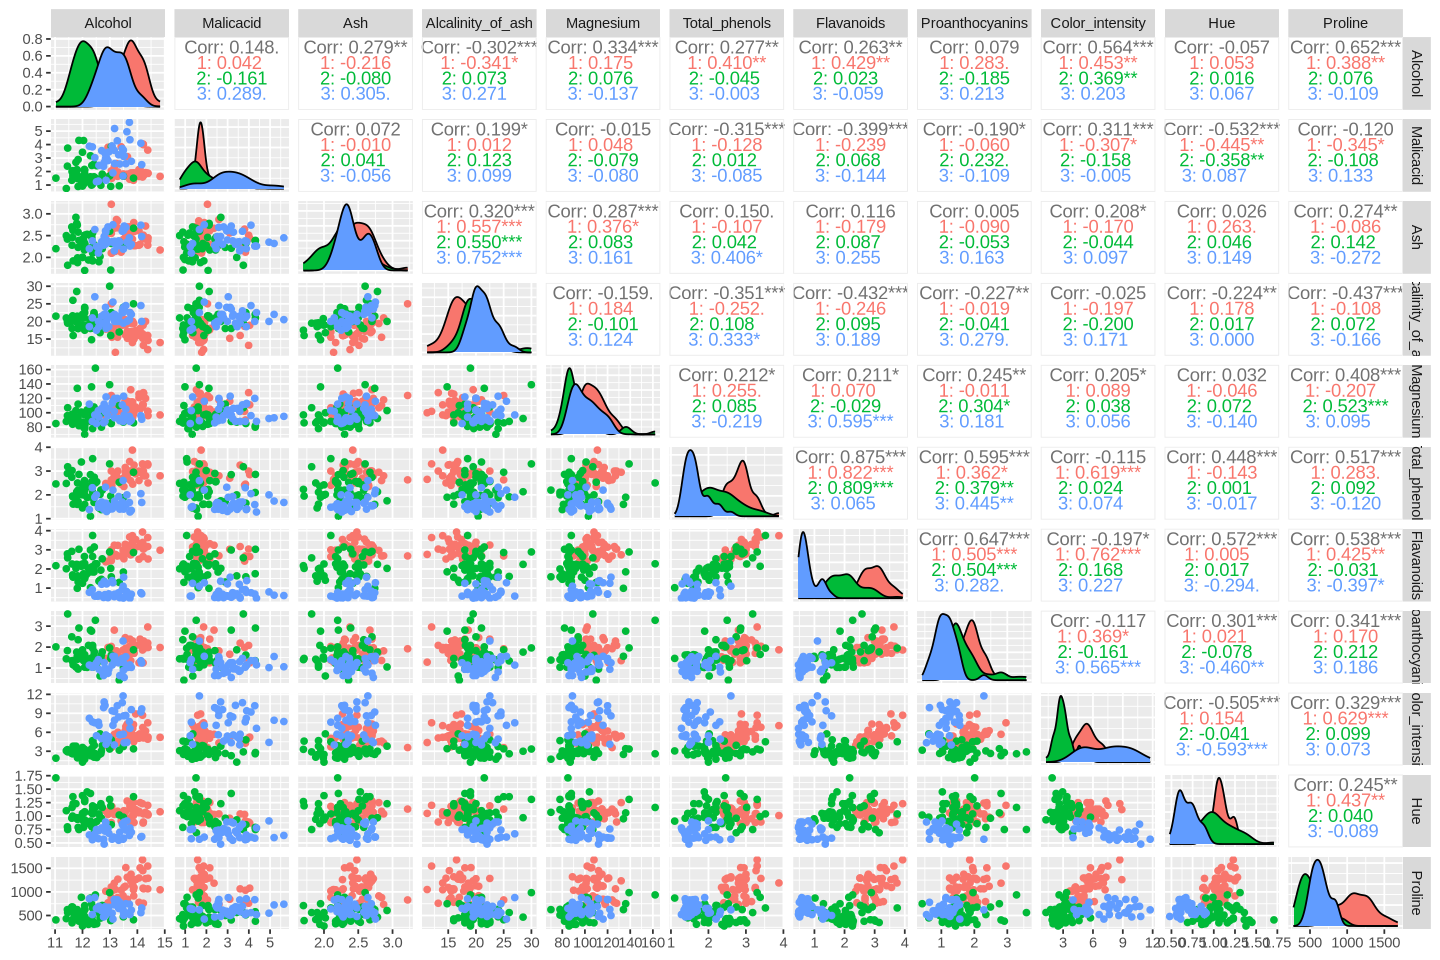

In [18]:
options(repr.plot.width =12 , repr.plot.height = 8) 
# wine_plot <- ggplot(wine_training, aes(x = Alcohol, y = Ash, colour = class)) + geom_point()
# wine_plot
predictor_column <-  c('Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids', 
                         'Proanthocyanins','Color_intensity', 'Hue','Proline')

data(wine_training)
ggpairs(wine_training, columns = predictor_column, ggplot2::aes(colour=class))